* [**TABLE OF CONTENTS**](#top)

* [Setting the goals](#goals)

* [Imports and loads](#imports)

* [1 **General information overview**](#step1)

* [1.1 Data Exploration](#explore)

* [1.2 Treating missing values](#missing_values)

* [**Intermediate conclusion**](#concl)


* [2 **Data analysis**](#da)

    * [2.1 Investigate the proportions of the various types of establishments. Plot a graph.](#2.1)
    * [2.2 Investigate the proportions of chain and nonchain establishments. Plot a graph.](#2.2)
    * [2.3 Which type of establishment is typically a chain?](#2.3)
    * [2.4 What characterizes chains: many establishments with a small number of seats or a few establishments with a lot 
    of seats?](#2.4)
    * [2.5 Determine the average number of seats for each type of restaurant. On average, which type of restaurant has 
    the greatest number of seats? Plot graphs.](#2.5)
    * [2.6 Put the data on street names from the address column in a separate column.](#2.6)
    * [2.7 Plot a graph of the top ten streets by number of restaurants.](#2.7)
    * [2.8 Find the number of streets that only have one restaurant.](#2.8)
    * [2.9 For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#2.9)

* [3 **Prepearing presentation**](#presentation)


* [General conclusion. Recomendations](#general_conclusion)


[Goals.](#goals)

It's decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we decide to try to attract investors. They’re interested in the current market conditions — will we be able to maintain our success when the novelty of robot waiters wears off?
As analysts, we prepared some data-driven market research, based on open-source data of establishments in LA. 

[Imports](#imports)

In [ ]:
# Installation command for usadress library
#! pip install usaddress --default-timeout=100

In [6]:
#! pip install plotly==5.5.0 --user

In [7]:
# Import all libraries
# Basic
import pandas as pd
import numpy as np
import regex as re
# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as offline
# Address parsing
import usaddress
# Configuration
import warnings
warnings.simplefilter(action='ignore')

In [8]:
# Load the data
try:
    rest_data = pd.read_csv('/content/drive/MyDrive/csv_fies/rest_data_us.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data_us.csv')

# [1 Step. Data preprocessing.](#step1)
[top](#top)


---


First things first we eed to explore the data we have and look for missing values, errors in data types or inappropriate zeros. To avoid repeated actions we can build some functions to help us!

In [9]:
# A function for locating zeros
def zero_func(data):
    for row in data:
        print(row, len(data[data[row] == 0]))

In [10]:
# Customized function for data exploring
def explore(data):
    print('Duplicated rows: {}'.format(data.duplicated().sum()))
    print('Duplicated id values: {}'.format(len(data) - len(data['id'].value_counts())))
    print()
    print('Dataframe Info:')
    data.info()
    print()
    print('Missing values:')
    print(data.isnull().sum())
    print()
    print('Checking zeros:')
    zero_func(data)
    print()

In [11]:
explore(rest_data)
rest_data.head()

Duplicated rows: 0
Duplicated id values: 0

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB

Missing values:
id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Checking zeros:
id 0
object_name 0
address 0
chain 5972
object_type 0
number 0



,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


`rest_data` table contains:

*object_name* — establishment name

*chain* — chain establishment (TRUE/FALSE)

*object_type* — establishment type

*address* — address

*number* — number of seats

In [12]:
# Check missing values
rest_data[rest_data['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Looks like we have 3 rows with supposedly missing values, but in this specific column they probalbly stand for 'False' boolean value. Let's replace them and fix the data type to boolean in this column.

In [13]:
# Fill misiing values
rest_data['chain'] = rest_data['chain'].fillna('False')

In [14]:
# Fix datatype
rest_data['chain'] = rest_data['chain'].apply(lambda x: bool(x))

In [15]:
# Check the result
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


# [Intermediate conclusion.](#concl) 


---

Our dataframe consists of 9651 rows with different types of establishments of LA, displaying the names, addresses, types of establishments, number of seats in each and whether the establishment belongs to a chain or not. There were no critical issues to the data, we filled 3 rows of missing values and corrected the data types. We can start analysing tendencies of the existing market.

# [2 Step. Data analysis](#da)
[top](#top)

---


[**Investigate the proportions of the various types of establishments. Plot a graph.**](#2.1)

In [16]:
# Count how many establishments are there
rest_data['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

In [17]:
# Prepare a subset to build the plot on
obj_types = rest_data.groupby(['object_type'], as_index=False)['object_name']\
.count().sort_values(by='object_name', ascending=False)
obj_types.columns = ['object_type', 'n_objects']
obj_types.style.bar(color='#ced7d8')

,object_type,n_objects
5,Restaurant,7255
3,Fast Food,1066
2,Cafe,435
4,Pizza,320
1,Bar,292
0,Bakery,283


In [18]:
# Add percents column for better representation
obj_types['percents'] = ((obj_types['n_objects'] / obj_types['n_objects']\
                          .sum()) * 100).round(2).astype('str') + '%'
obj_types

,object_type,n_objects,percents
5,Restaurant,7255,75.17%
3,Fast Food,1066,11.05%
2,Cafe,435,4.51%
4,Pizza,320,3.32%
1,Bar,292,3.03%
0,Bakery,283,2.93%


In [19]:
# Build the figure of the plot
fig = px.bar(obj_types, x='object_type', y='n_objects', color='object_type',
             width=990, height=600, 
             labels = {'object_type': 'Establishmet type', 'n_objects': 'Amount of establishments'}, text='n_objects')
# Customize the text position 
fig.update_traces(textposition='outside')
fig.update_layout(title_text="Number of establishment types",
                  title_font_size=30)
# Add percentage to the legend
for trace, percents in zip(fig.data, obj_types['percents']):
    trace.name = trace.name.split('=')[0] + ' (' + percents + ')'
fig.show()

As we can see the majority of the establishments are represented as restaurants with 75% share,\n'
'followed by fast food 11%, cafe 4.5%, pizza 3.3%, bars 3% and bakeries with 2.9%.

In [20]:
fig = go.Figure(data=[go.Pie(labels=obj_types['object_type'], values=obj_types['n_objects'], 
                             textinfo='label+percent', 
                             pull=[0, 0, 0.2, 0])])

fig.update_traces(hoverinfo='label+percent')
fig.update_layout(title_text="The shares of types of establishments",
                  title_font_size=30)
fig.show()

An alternative view on the same share distribution

[**Investigate the proportions of chain and nonchain establishments. Plot a graph.**](#2.2)

In [21]:
fig = go.Figure(data=go.Pie(labels=rest_data['chain'].value_counts().reset_index()['index'], 
                            values=rest_data['chain'].value_counts()))
fig.update_layout(
    title={
        'text':'Chain and nonchain establishments ratio',
        'y':0.9,
        'x':0.48})

for trace in fig.data:
    trace['labels']=['Non chain', 'Chain']
fig.show()

The chain establishments take 38% of the market, rest of them are nonchain. Lets' make this comparison a little bit more detailed, and check the differnce in amounts of chain and nonchain establishment types.

In [22]:
group_data = rest_data.groupby(['object_type', 'chain'], as_index=False).count()
group_data.head()

,object_type,chain,id,object_name,address,number
0,Bakery,True,283,283,283,283
1,Bar,False,215,215,215,215
2,Bar,True,77,77,77,77
3,Cafe,False,169,169,169,169
4,Cafe,True,266,266,266,266


In [23]:
fig = px.histogram(group_data, y='object_type', x='id', color='chain', barmode='group',
                   width=990, height=600,
                  labels = {'object_type': '', 'id': 'establishments'})

fig.update_layout(title_text="Distribution of chain and nonchain object types",
                  title_font_size=30)

fig.show()

There are much more restaurants and bars that don't belong to chains. On the contrary - there are no nonchain bakeries and we are more likely to find a cafe and a fastfood establishment to be in chain.There are no nonchain bakeries. There are much more restaurants and bars that don't belong to chains. As well as more often you will find a cafe and a fastfood establishment to be in chain.

[**Which type of establishment is typically a chain?**](#2.3)

Lets' look at the distribution of types of objects of chains alone. We need to filter them out of the initial dataframe, calculate their amount and the share they take.

In [24]:
# Calculating the number of establishments in chains
chain_obj_types = rest_data[rest_data['chain'] == True]\
                    .groupby('object_type', as_index=False).agg({'object_name':'count'})\
                    .sort_values(by = 'object_name', ascending = False)

In [25]:
# Rename columns
chain_obj_types.columns = ['object_type', 'n_objects']

In [26]:
# Calculate the percentage
chain_obj_types['percents'] = ((chain_obj_types['n_objects'] / chain_obj_types['n_objects'].sum()) * 100)\
                                .round(2).astype('str') + '%'

In [27]:
chain_obj_types.style.bar(color='#ced7d8')

,object_type,n_objects,percents
5,Restaurant,2294,62.35%
3,Fast Food,605,16.44%
0,Bakery,283,7.69%
2,Cafe,266,7.23%
4,Pizza,154,4.19%
1,Bar,77,2.09%


In [28]:
fig = px.bar(chain_obj_types, x='object_type', y='n_objects', color='object_type',
             width=900, height=600,
             labels={'object_type': 'Establishment  type', 'n_objects': 'Amount of establishments'}, text='n_objects')
fig.update_layout(title_text="Types of chain establishments",
                  title_font_size=30)
fig.update_traces(textposition='outside')
for trace, percents in zip(fig.data, chain_obj_types['percents']):
    trace.name = trace.name.split('=')[0] + ' (' + percents + ')'

fig.show()

If we filter the data and have a look only at the 38% of chain establishments and check the object types representation we will see that the majority is still restaurants and fast food establishments. The overall trend remains. Note, that all bakeries are represented as chain establisments.

[**What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?**](#2.4)

First, lets' take a look at the overall seats distribution.

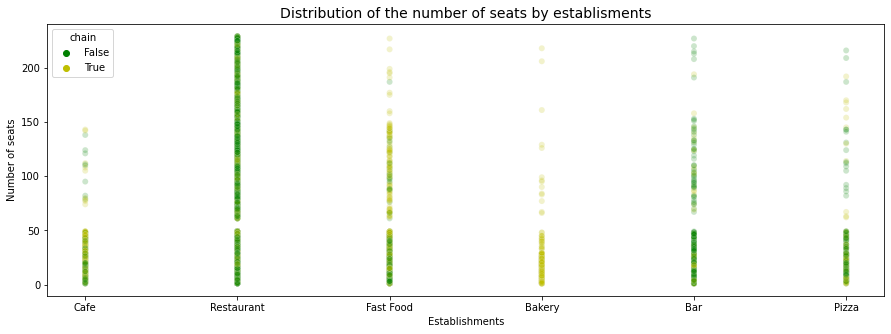

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=rest_data, x='object_type', y='number', hue='chain', alpha=0.2, palette={False: 'g', True: 'y'})
plt.title('Distribution of the number of seats by establisments', fontsize=14)
plt.xlabel('Establishments')
plt.ylabel('Number of seats')
plt.show()

Among those types of establishments that belong to chains, we can see that the lower part of the graph is chains, so that must be means, that the number of seats in chain establishments is usually less than in nonchain establishments. Now, lets' focus more on the chains.

In [30]:
chains = rest_data[rest_data['chain']==True]
chains['object_name'].value_counts()

THE COFFEE BEAN & TEA LEAF               47
SUBWAY                                   31
DOMINO'S PIZZA                           15
KENTUCKY FRIED CHICKEN                   14
WABA GRILL                               14
                                         ..
YUM YUM DONUTS # 75-P                     1
STARBUCKS COFFEE #13286                   1
THE FRENCH CREPE COMPANY PREP KITCHEN     1
YUM YUM CHINESE FOOD                      1
CAFE SPROUTS                              1
Name: object_name, Length: 2736, dtype: int64

There is a certein naming problem in our dataset - some of the establishments names are not unique, although they should be. For example, we have `STARBUCKS` and `STARBUCKS COFFEE`. Lets' try to adress as much of such mistakes as we can and standartize the names to one row.

In [31]:
# Using regular expressions define the pattern to be treated
def chain_name(row):
    # finds a pattern that starts with a # symbol, optionally followed by space, and digits
    i = re.sub(r'\#\s*(\d+)', '', row) 
    i = i.replace('#', '') # finds just the # symbol and replacs it with empty string
    return i

In [32]:
# Check the function
chain_name("MCDONALD'S #8014")

"MCDONALD'S "

In [33]:
chains['chain_name'] = chains['object_name'].apply(chain_name)

In [34]:
chains['chain_name'].value_counts()

STARBUCKS COFFEE               85
SUBWAY                         82
MCDONALD'S                     65
JACK IN THE BOX                52
THE COFFEE BEAN & TEA LEAF     47
                               ..
KFC TACO BELL E791001           1
EAGLE ROCK NOODLE AND GRILL     1
MELS DELI                       1
MARTHA'S KITCHEN                1
CAFE SPROUTS                    1
Name: chain_name, Length: 2176, dtype: int64

The picture certainly improved from before, but theres' still some issues with the names: big chains are written too differently, this could mislead our calculations. Let's build another function that will unify the names of the big chains.

In [35]:
def chain_name_group(row):
    if row.startswith('KFC') or row.startswith('KENTUCKY FRIED CHICKEN'):
        row = row.replace(row, 'KENTUCKY FRIED CHICKEN')
    if row.startswith('SUBWAY'):
        row = row.replace(row, 'SUBWAY')
    if row.startswith('THE COFFEE BEAN & TEA LEAF') or row.startswith('COFFEE BEAN AND TEA LEAF'):
        row = row.replace(row, 'THE COFFEE BEAN & TEA LEAF')
    if row.startswith('STARBUCKS'):
        row = row.replace(row, 'STARBUCKS')
    if row.endswith('BUSKIN ROBINS') or row.startswith('BUSKIN ROBINS'):
        row = row.replace(row, 'BUSKIN ROBINS')
    if row.startswith("MCDONALD'S"):
        row = row.replace(row, "MCDONALD'S")
    return row

In [36]:
# Check the function
chain_name_group('KFC sk')

'KENTUCKY FRIED CHICKEN'

In [37]:
chains['chain_name_final'] = chains['chain_name'].apply(chain_name_group)

In [38]:
chains['chain_name_final'].value_counts()

SUBWAY                            152
STARBUCKS                         129
MCDONALD'S                         82
THE COFFEE BEAN & TEA LEAF         61
JACK IN THE BOX                    52
                                 ... 
CHICO'S MEXICAN RESTAURANT          1
MI COCINTA CHAPINA RESTAURANTE      1
LA FITNESS JUICE BAR                1
FULL HOUSE SEAFOOD RESTAURAN        1
CAFE SPROUTS                        1
Name: chain_name_final, Length: 2120, dtype: int64

The function worked and we can visualize our data.

In [39]:
# Sort the biggest 30 chains
orderd_df = chains[['id', 'chain_name_final']].groupby(['chain_name_final'])\
.count().sort_values(by='id').reset_index().tail(30)
orderd_df

,chain_name_final,id
2090,JERSEY MIKE'S SUBS,8
2091,BASKIN ROBBINS,8
2092,CARL'S JR,8
2093,BLUE BOTTLE COFFEE,9
2094,FOOD 4 LESS,9
2095,EL POLLO LOCO,10
2096,LOUISIANA FRIED CHICKEN,10
2097,CHIPOTLE MEXICAN GRILL,10
2098,WINGSTOP,10
2099,PAPA JOHN'S PIZZA,12


Now we have what we need. Lets' have a look at our 30 biggest chains!

In [40]:
my_range = range(1, 31)

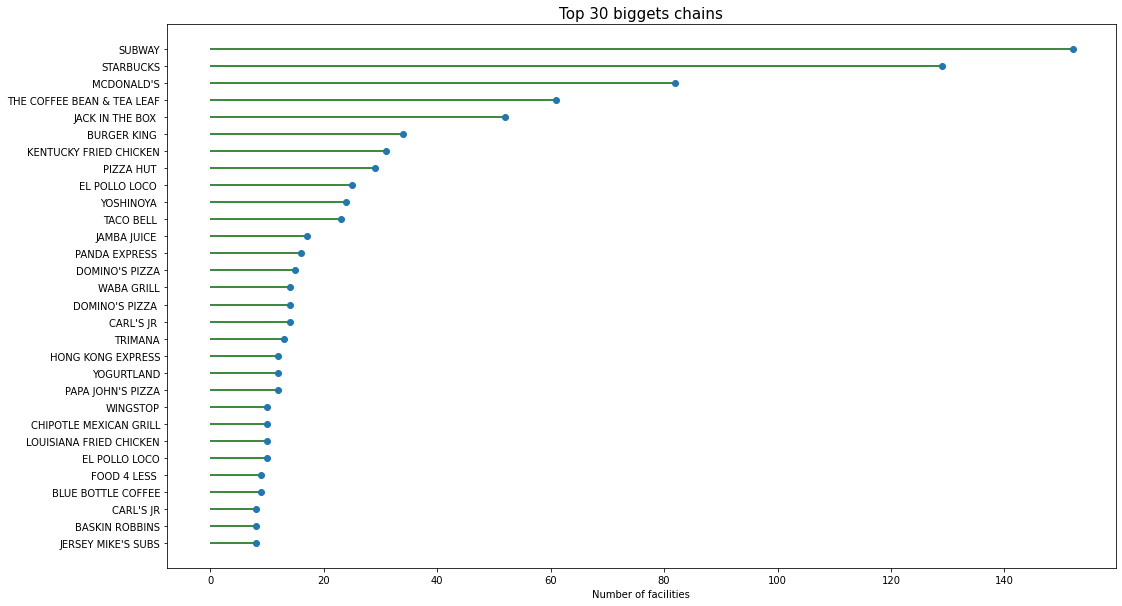

In [41]:
fig,ax=plt.subplots(figsize=(17, 10))
plt.hlines(y=my_range, xmin=0, xmax=orderd_df['id'], color='darkgreen')
plt.plot(orderd_df['id'], my_range, "o")
plt.yticks(my_range, orderd_df['chain_name_final'])
plt.title('Top 30 biggets chains', fontdict={'size':15})
plt.xlabel('Number of facilities')
plt.ylabel('')

plt.show()

Well, `SUNWAY`, `STARBUCKS` and `MCDONALD'S` are the leaders without surprise. 

Now, lets' check how the amount of facilities in a chain correlates with the median number of seats.

In [42]:
# Filter only the chain establishments
chain_seat = chains.groupby(['chain_name_final'], as_index = False)\
.agg({'chain_name_final': 'count', 'number': 'median'}).sort_values(by = 'number', ascending = False)

In [43]:
chain_seat.columns = ['n_objects', 'median_seats']
chain_seat

,n_objects,median_seats
1292,1,229.0
1993,1,227.0
322,1,226.0
230,1,225.0
977,1,225.0
...,...,...
1290,1,1.0
827,1,1.0
1315,1,1.0
522,1,1.0


In [44]:
fig = go.Figure(data=go.Scattergl(
    x = chain_seat['median_seats'],
    y = chain_seat['n_objects'],
    mode='markers',
    marker=dict(
        color=chain_seat['median_seats'],
        colorscale='Viridis',
        line_width=1)))

fig.update_layout(title_text='Scatterplot of median number of seats in chain establismennts',
                  title_font_size=20,
                  width=900, height=600)

fig.add_hline(y=np.percentile(chain_seat['n_objects'], 90))
fig.add_vline(x=np.percentile(chain_seat['median_seats'], 90))
fig.update_xaxes(title_text='Median number of seats')
fig.update_yaxes(title_text='Amount of establishments')


fig.update_traces(hoverinfo='all', hovertemplate='median_seats: %{x}<br>n_objects: %{y}')
fig.show()

So, for chain establisments it is typical to have a small amount of facilities with a large number of seats.

Note the dots in the lower left corner - they are our average values, and there we can see that on average there are about 106 seats and 2 facilities in chain establishments.

[**Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.**](#2.5)

In [45]:
rest_data['number'].describe()

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

An average establishment in LA, regardless of what type it is, has 43 seats. But we see that this number is rather close to the 75th quartile than to the 50-th, or the median, so later, when we group our data by the establishment type we should better base the analysis upon the median.

In [46]:
# Calculate the median number of seats
seats_by_types = rest_data.groupby(['object_type'], as_index=False)['number']\
.median().sort_values(by='number', ascending=False)

In [47]:
seats_by_types.style.bar(color='#ced7d8')

,object_type,number
5,Restaurant,29.000000
1,Bar,28.500000
2,Cafe,21.000000
3,Fast Food,21.000000
4,Pizza,18.500000
0,Bakery,18.000000


In [48]:
fig = px.bar(seats_by_types, x='object_type', y='number', color='object_type',
             title = 'Average number of seats in different types of establishments',
             width=900, height=600, 
             labels={'object_type': 'Establishment  type', 'number': 'Amount of seats'}, text='number')
fig.update_layout(title_text='Average number of seats in different types of establishments',
                  title_font_size=25)
fig.update_traces(textposition='outside')
for trace, number in zip(fig.data, seats_by_types['number']):
    trace.name = trace.name.split('=')[0] + ' (' + str(number) + ')'

fig.show()


As we can see from the graph the average number of seats is the highest and almost equal for restaurants with 29 seats on average and bars with 28.5 seats on average. Cafes and bars share second place with 21 seats each and 18.5 and 18 seats on average have pizza places and bakaries.

[**Put the data on street names from the address column in a separate column.**](#2.6)

In [49]:
# Build a function to parse and cleen the address
def cleaning_check(raw):
    raw_address = usaddress.parse(raw)
    dict_address = {}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    # This line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress = str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

In [50]:
rest_data['clean_street'] = rest_data.address.apply(cleaning_check)

We need to check the result for errors

In [51]:
rest_data[rest_data['clean_street'] == 'no street or number']

,id,object_name,address,chain,object_type,number,clean_street
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


Some of the street names were not processed properly by the usaddress package, but there are quite few names, so we can fix this manualy.

In [52]:
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress = 'OLVERA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST'
    else:
        raw_address = usaddress.parse(raw)
        dict_address = {}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress = str(dict_address['StreetName']).upper()
    return clean_adress

In [53]:
rest_data['clean_street_final'] = rest_data.address.apply(cleaning_final)
rest_data.sample(10)

,id,object_name,address,chain,object_type,number,clean_street,clean_street_final
4301,16087,NANBANKAN,11330 SANTA MONICA BLVD,False,Restaurant,44,MONICA,MONICA
4398,16184,CBS EXECUTIVE KITCHEN,7800 BEVERLY BLVD,False,Restaurant,18,BEVERLY,BEVERLY
926,12712,LACMA PLAZA,5905 W WILSHIRE BLVD,False,Restaurant,125,WILSHIRE,WILSHIRE
4859,16645,RALPHS MARKET #44,12057 WILSHIRE BLVD,True,Cafe,27,WILSHIRE,WILSHIRE
9300,21086,RAMONA'S FOOD PRODUCTS,6900 S SAN PEDRO ST,True,Restaurant,27,PEDRO,PEDRO
1097,12883,BEBINCA,1001 S VERMONT AVE # 107,False,Restaurant,6,VERMONT,VERMONT
9620,21406,PSM PASEO SAN MIGUEL,4626 AVALON BLVD,False,Restaurant,4,AVALON,AVALON
3553,15339,EGG ROLL KING,3111 N SAN FERNANDO RD,False,Restaurant,22,FERNANDO,FERNANDO
9215,21001,STARBUCKS COFFEE #5995,1850 W SLAUSON AVE,True,Cafe,49,SLAUSON,SLAUSON
348,12134,CATALINA'S BAR & GRILL,6725 W SUNSET BLVD,False,Restaurant,185,SUNSET,SUNSET


[**Plot a graph of the top ten streets by number of restaurants.**](#2.7)

First we need to prepare our data for the plot: we need to count establishments on every cleaned street and define the 10 most crowded.

In [54]:
group_streets = rest_data.groupby(['clean_street_final']).agg({'object_name': 'count'}).reset_index()

In [55]:
# Rename the columns
group_streets.columns = ['streets', 'objects']

In [56]:
# Store only the first 10 rows
top10_streets = group_streets.sort_values(by='objects', ascending=False).head(10)

In [57]:
print(top10_streets)
print()
fig = px.bar(top10_streets, y='streets', x='objects', 
             color='streets', width = 900, height = 600, text='objects')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Top 10 streets with the most establishments',
    title_font_size=30,
    xaxis_title=" ",
    yaxis_title="Amount of establishments")
fig.update_traces(textposition='outside')
for trace, numbers in zip(fig.data, top10_streets['objects']):
    trace.name = trace.name.split('=')[0] + ' (' + str(numbers) + ')'
fig.show()

       streets  objects
387     SUNSET      405
438   WILSHIRE      398
335       PICO      371
430    WESTERN      369
175   FIGUEROA      334
319    OLYMPIC      309
408    VERMONT      288
296     MONICA      264
23         3RD      263
222  HOLLYWOOD      254



SUNSET and WILSHIRE are the most crowded streets. The number of establishments on our top10 streets vary between 250 and 400. There must be quit a big competition out there.

[**Find the number of streets that only have one restaurant.**](#2.8)

In [58]:
one_str_objects = group_streets[group_streets['objects'] == 1]

In [59]:
print('There are', len(one_str_objects), 'streets with only one establishment')

There are 178 streets with only one establishment


[**For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?**](#2.9)

We need to refer to the top10 subset and filter the data about those streets.

In [60]:
top10_streets_list = top10_streets['streets'].to_list()

In [61]:
top10_streets_data = rest_data.query('clean_street_final in @top10_streets_list')

In [62]:
top10_streets_data.head()

,id,object_name,address,chain,object_type,number,clean_street,clean_street_final
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET,SUNSET
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,SUNSET,SUNSET
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,WESTERN,WESTERN
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,SUNSET,SUNSET


In [63]:
fig = px.box(top10_streets_data, x='number', y='clean_street_final', points='all',
             color='clean_street_final',
             labels={'number': 'Number of seats', 'clean_street_final': ' '})
fig.update_layout(autosize=False,
    width=900,
    height=800,
    title='Overall distribution of the number of seats most crowded streets',
    title_font_size=20,
    boxgap=0.2)

fig.show()

`HOLLOWOOD`, `SUNSET`  and `WILSHIRE` streets have the most varied amount of seats, their distribution is similar, but `WILSHIRE` has the highest median number - 36. Let's group our data by chain attribution to see what the difference is like.

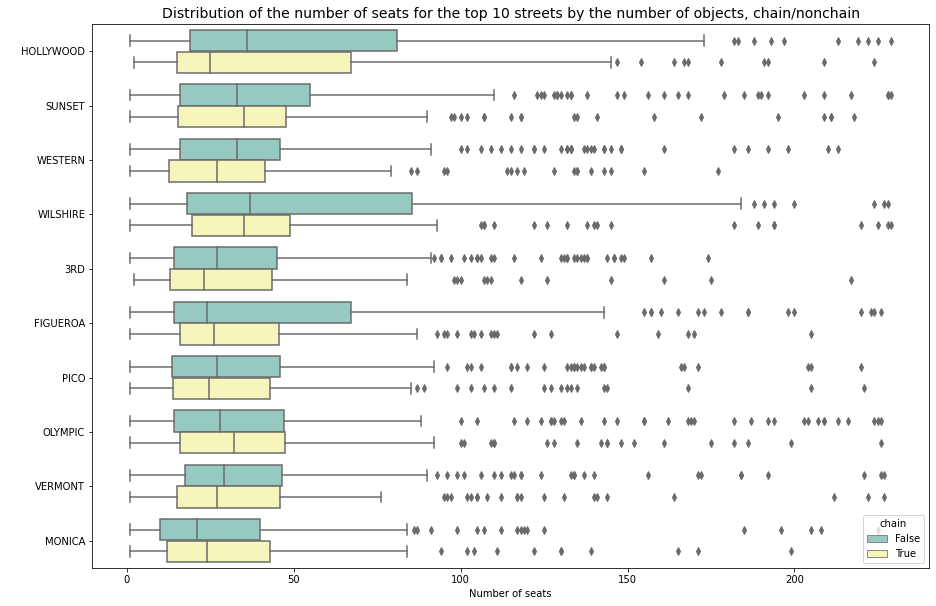

In [64]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='number', y='clean_street_final', hue='chain', data=top10_streets_data, palette='Set3')
plt.title('Distribution of the number of seats for the top 10 streets by the number of objects, chain/nonchain', fontsize=14)
plt.xlabel('Number of seats')
plt.ylabel(' ')
plt.show()

On 6 of the top 10 streets the median of seats is higher at chain establishments.

# [3 Step. Preparing a presentation](#presentation)
[top](#top)


Presentation is availiable on this [link](https://drive.google.com/file/d/12iFTDxTcKOeBrpinlSEONvhrA-RUsjKN/view?usp=sharing)

[**Overall conclusions and recommendations.**](#general_conclusion)

[top](#top)


The main characteristics of the F&B market:

There is quite a high concurrency on the most crowded streets of LA. 
The largest share among LA establishments is **cafes** (75%), **fast food** take 11% of all establishments.
Almost **40% of establishments belong to chains** (among them: restaurants 62.35%, fast food places 16.44%, bakeries 7.69%, cafes 7.23%, pizza places 4.19% and bars 2.09%)
The biggest chains are fast food type and coffee shop franchises - **SUBWAY, STARBUCKS and MCDONALD'S**.

A typical establishment has about 40 seats.

On the most crowded streets  the average number of seats is about **35**.

**Based on the results of the analysis, recommendations will be:**

The preferred type of establishment will be a restaurant as the most popular type of establishment comparing to the rest, or fast food as the easiest option to enter the market and provide an opportunity for chain development, in this case, we should pay attention to popular franchises (SUBWAY, STARBUCKS and MCDONALD'S) and introduce a new type of service - with the help of robots.
The recommended number of seats will be 30-35 for restaurant type.
For both restaurants and fast food, the most acceptable location would be a crowded place, for example, near shopping and entertainment complexes or inside them, near business centers, office buildings or educational institutions. Districts - where the top10 streets are located.

When choosing a location, we should take into account the presence of competitors nearby.